In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
import itertools

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf 

In [68]:
df_train = pd.read_parquet("output_04.parquet")

In [69]:
df_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,tax_status,gains,losses,stocks_status,citizenship,migration_year,country_of_birth_own,migration_code_change_in_msa,migration_code_change_in_reg,income_above_limit
0,79,1,secondary_complete,Widowed,White,All other,Not in labor force,0,0,52,...,Head of household,0,0,292,Native,95,US,?,?,0
1,65,1,secondary_complete,Widowed,White,All other,Children or Armed Forces,0,0,0,...,Single,0,0,0,Native,94,US,unchanged,unchanged,0
2,21,0,secondary_incomplete,Never married,Black,All other,Children or Armed Forces,0,500,15,...,Single,0,0,0,Native,94,US,unchanged,unchanged,0
3,2,1,child,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,Nonfiler,0,0,0,Native,94,US,unchanged,unchanged,0
4,70,0,secondary_complete,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Joint both 65+,0,0,0,Native,95,US,?,?,0


# **Gráficas**


## 1. Distribución del empleo según ingresos (gráfico de barras apiladas)
- La mayoría de los individuos en la categoría **"Children or Armed Forces"** están por debajo del límite de ingresos.
- Los **"Full-time schedules"** también presentan un predominio de personas con ingresos por debajo del límite.
- Las categorías **"Not in labor force"** tienen menores proporciones relativas, pero mantienen la tendencia de ingresos mayoritarios por debajo del límite.

<Figure size 1000x600 with 0 Axes>

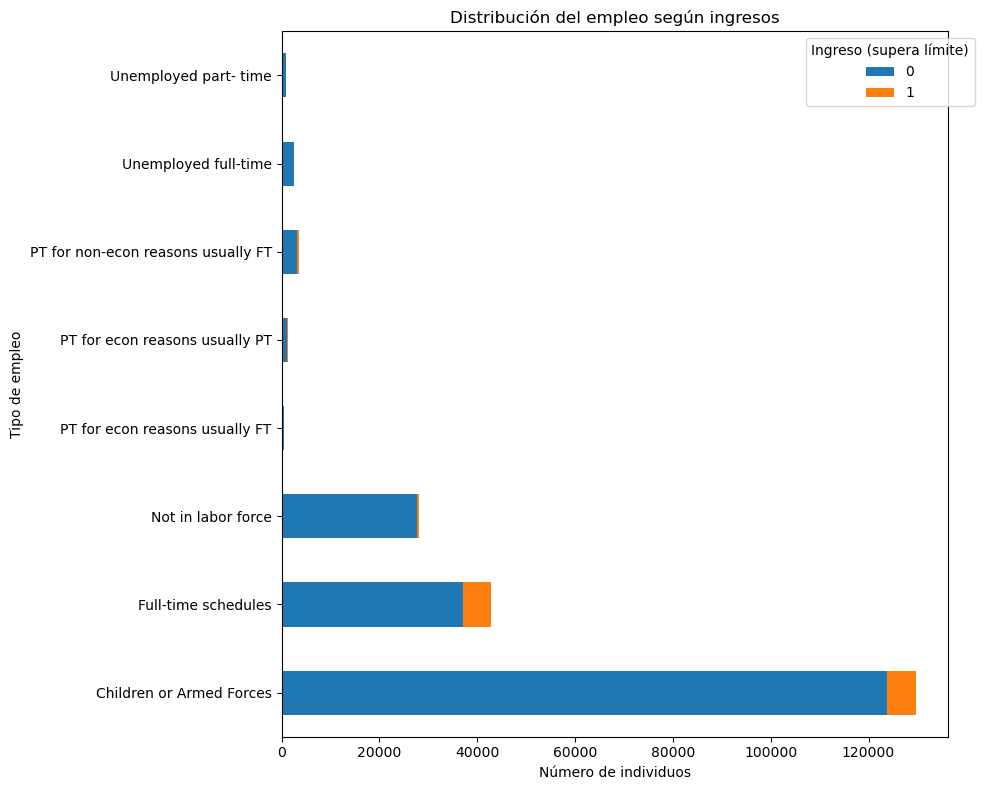

In [72]:
# Gráfico : Distribución del empleo según ingresos
#GRÁFICO DE BARRAS APILADAS HORIZONTALES
plt.figure(figsize=(10, 6))
employment_income = df_train.groupby(['employment_commitment', 'income_above_limit']).size().unstack()

employment_income.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Distribución del empleo según ingresos')
plt.xlabel('Número de individuos')
plt.ylabel('Tipo de empleo')
plt.legend(title='Ingreso (supera límite)', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 2. Relación entre nivel educativo y estado civil (gráfico de barras apiladas)
- Las personas clasificadas como **"Children"** tienen mayor representación en la categoría de **"Never married"**, como era esperado.
- Aquellos con niveles educativos más altos, como **"secondary_complete"**, tienden a estar casados (**"Married-civilian spouse present"**).
- Los niveles educativos intermedios tienen una mayor diversidad en los estados civiles.

<Figure size 1200x600 with 0 Axes>

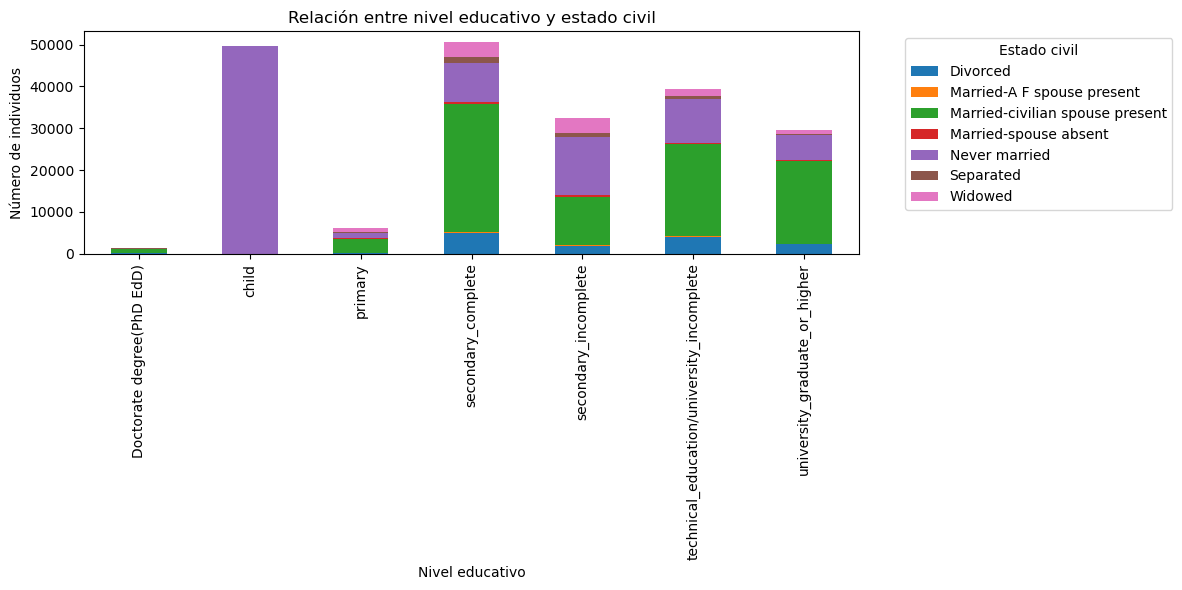

In [74]:
# Gráfico : Relación entre nivel educativo y estado civil 
#GRÁFICO DE BARRAS APILADAS VERTICALES

plt.figure(figsize=(12, 6))
education_marital = df_train.groupby(['education', 'marital_status']).size().unstack()

education_marital.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre nivel educativo y estado civil')
plt.xlabel('Nivel educativo')
plt.ylabel('Número de individuos')
plt.legend(title='Estado civil', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## 3. Edad media por nivel educativo (gráfico de líneas)
- Existe una relación directa entre el nivel educativo y la edad media.
- Las personas en categorías más jóvenes tienden a tener niveles educativos básicos (**"Children"**), mientras que niveles como **"doctorate"** o **"primary"** están asociados con edades más avanzadas.

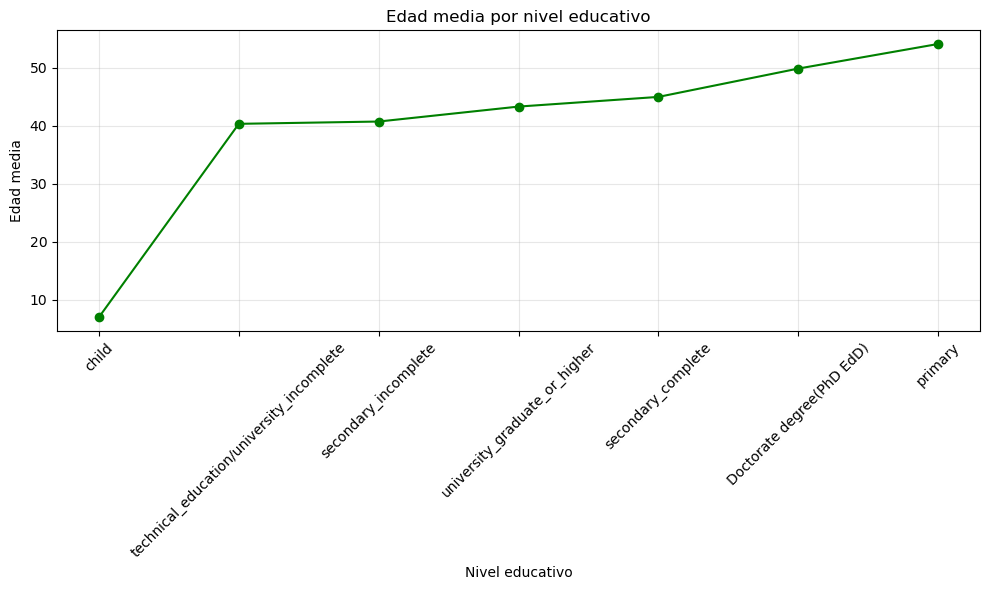

In [76]:
# Gráfico : Tendencia de edad MEDIA por nivel educativo
#GRÁFICO DE LÍNEAS
age_mean_by_education = df_train.groupby('education')['age'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.plot(age_mean_by_education, marker='o', linestyle='-', color='green')
plt.title('Edad media por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Edad media')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Relación entre edad y ganancias (gráfico de dispersión)
- Las ganancias están distribuidas principalmente en valores bajos, independientemente de la edad.
- Hay algunas personas mayores con ganancias significativamente altas, pero representan un porcentaje reducido.

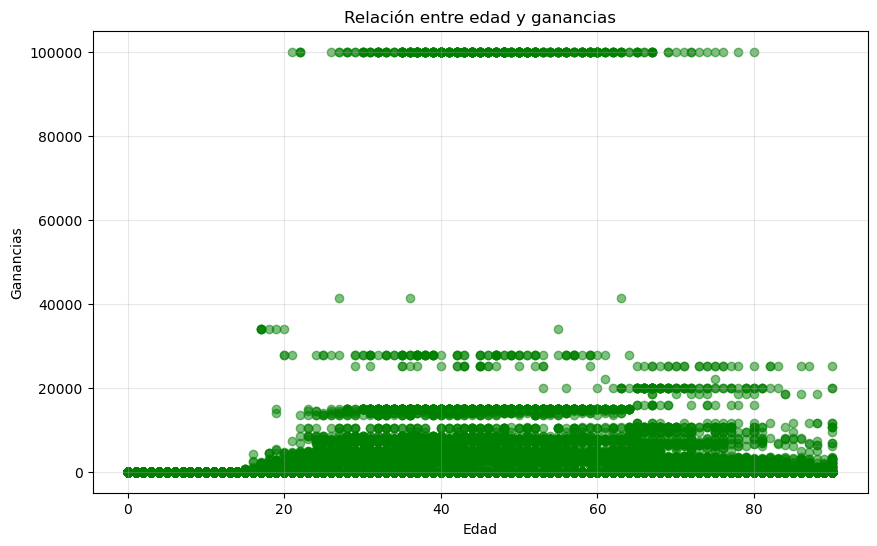

In [78]:
# Gráfico : Relación entre edad y ganancias
#GRÁFICO DE DISPERSIÓN
plt.figure(figsize=(10, 6))
plt.scatter(df_train['age'], df_train['gains'], alpha=0.5, c='green')
plt.title('Relación entre edad y ganancias')
plt.xlabel('Edad')
plt.ylabel('Ganancias')
plt.grid(alpha=0.3)
plt.show()

## 5. Relación entre edad y pérdidas (gráfico de dispersión)
- Al igual que las ganancias, las pérdidas tienden a concentrarse en valores bajos.
- Hay individuos en edades intermedias que experimentan pérdidas más altas, aunque siguen siendo casos atípicos.

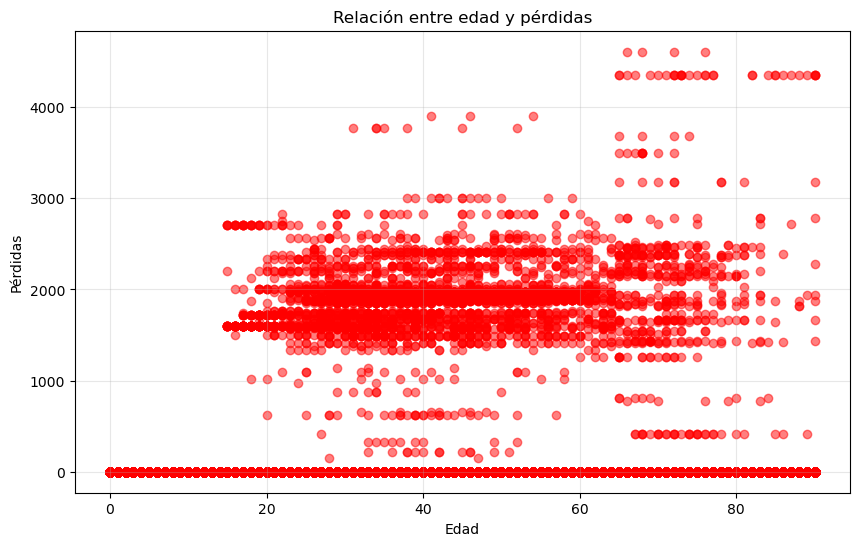

In [80]:
# Gráfico: Relación entre edad y pérdidas
#GRÁFICO DE DISPERSIÓN
plt.figure(figsize=(10, 6))
plt.scatter(df_train['age'], df_train['losses'], alpha=0.5, c='red')
plt.title('Relación entre edad y pérdidas')
plt.xlabel('Edad')
plt.ylabel('Pérdidas')
plt.grid(alpha=0.3)
plt.show()


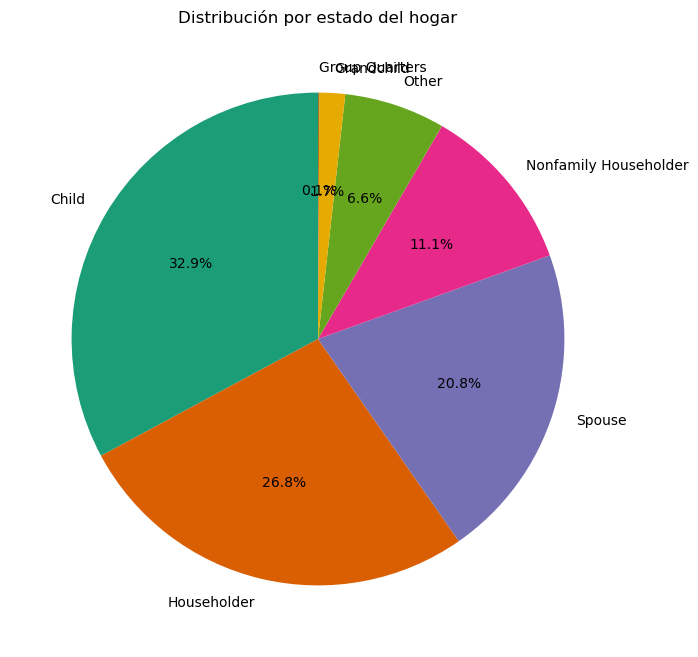

In [81]:
# Gráfico: Distribución por estado del hogar
#GRÁFICO DE TARTA
household_stat_counts = df_train['household_stat'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(household_stat_counts, labels=household_stat_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Dark2.colors)
plt.title('Distribución por estado del hogar')
plt.show()

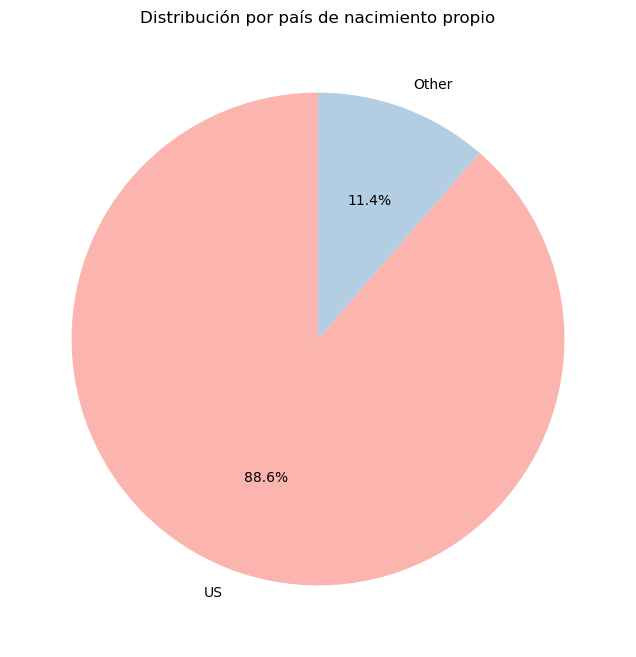

In [82]:
# Gráfico : Distribución por país de nacimiento propio
#GRÁFICO DE TARTA
country_of_birth_counts = df_train['country_of_birth_own'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(country_of_birth_counts, labels=country_of_birth_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribución por país de nacimiento propio')
plt.show()